# **EXPERIMENT 6**

# **Train - Test Ratio**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
iris = sns.load_dataset('iris')

In [ ]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [ ]:
fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10) > 4
print(fakedata),print(' ')
print(fakelabels)
train_data, test_data, train_labels, test_labels = train_test_split(fakedata, fakelabels, test_size=.2)
print('Training data size: ' + str(train_data.shape))
print('Test data size: ' + str(test_data.shape))
print(' ')

print('Training data: ')
print(train_data)
print(' ')
print('Test data: ')
print(test_data)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]
Training data size: (8, 4)
Test data size: (2, 4)
 
Training data: 
[[ 21  22  23  24]
 [ 91  92  93  94]
 [101 102 103 104]
 [ 51  52  53  54]
 [ 31  32  33  34]
 [ 11  12  13  14]
 [ 71  72  73  74]
 [ 41  42  43  44]]
 
Test data: 
[[61 62 63 64]
 [81 82 83 84]]


In [ ]:
def createANewModel():
  ANNiris = nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,3),
  )

  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(ANNiris.parameters(), lr = .01) #make change here 
  return ANNiris, lossfun, optimizer

#def createANewModel():
  #ANNiris = nn.Sequential(
      #nn.Linear(4, 64),
      #nn.ReLU(),
      #nn.Linear(64, 64),
      #nn.ReLU(),
      #nn.Linear(64, 64),  # add another hidden layer
      #nn.ReLU(),          # add another ReLU activation function
      #nn.Linear(64, 3)
  #)

numepochs = 200 #make change here 
def trainTheModel(trainProp):
  losses = torch.zeros(numepochs)
  trainAcc = []
  testAcc = []
  for epochi in range(numepochs):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size = trainProp)
    yHat = ANNiris(X_train)
    loss = lossfun(yHat, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    trainAcc.append(100*torch.mean((torch.argmax(yHat, axis=1) == y_train).float()).item())

    predlabels = torch.argmax(ANNiris(X_test), axis = 1)
    testAcc.append(100*torch.mean((predlabels == y_test).float()).item())
    return trainAcc, testAcc



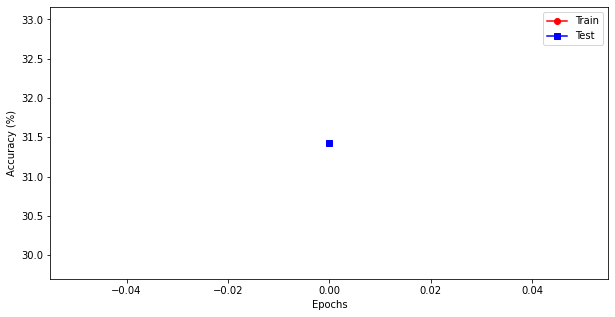

In [ ]:
ANNiris,lossfun,optimizer = createANewModel()
trainAcc, testAcc = trainTheModel(.7) 
#make change here 

fig = plt.figure(figsize=(10,5))
plt.plot(trainAcc,'ro-')
plt.plot(trainAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])
plt.show()

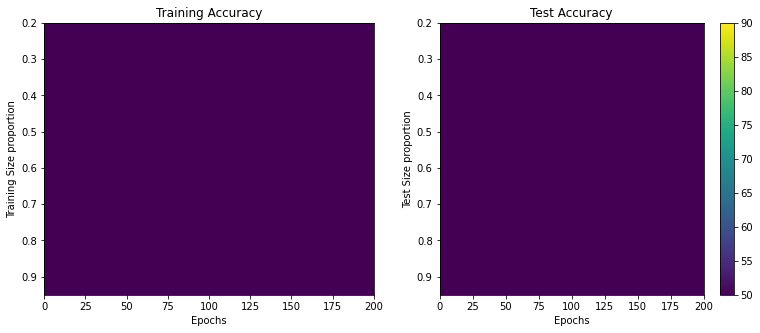

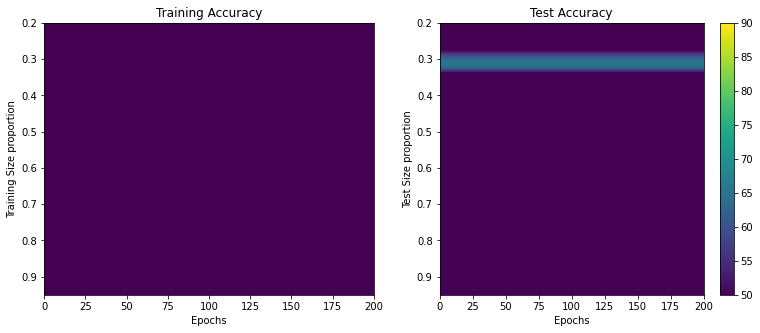

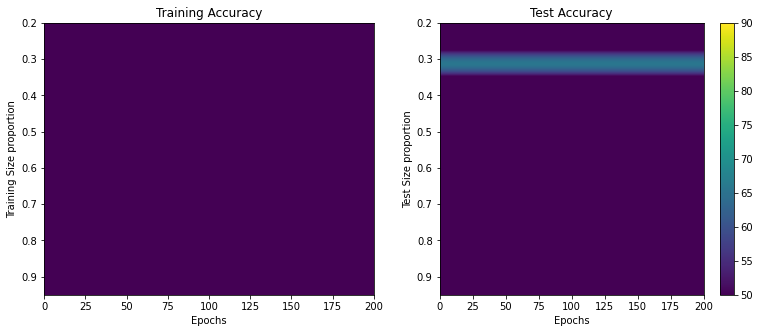

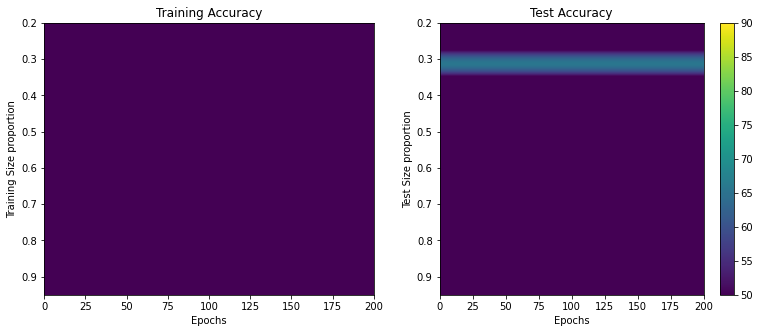

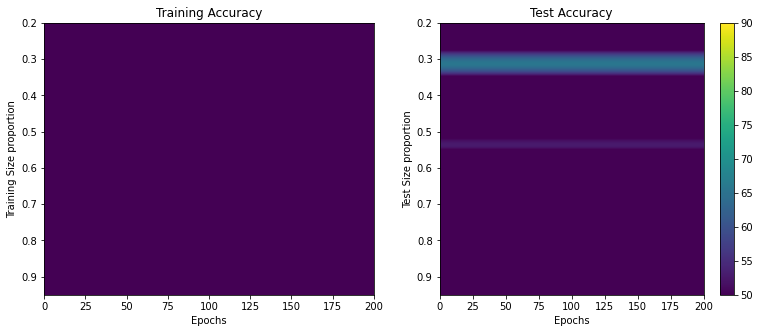

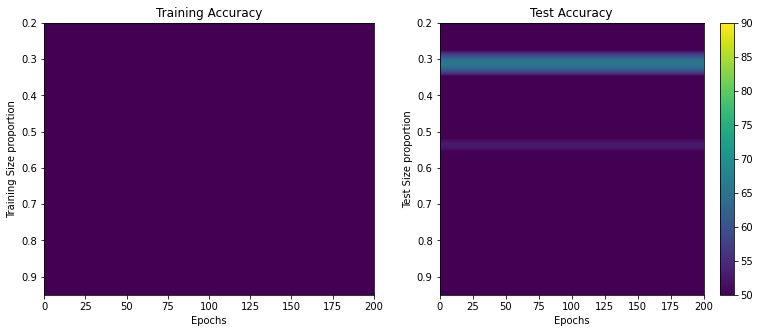

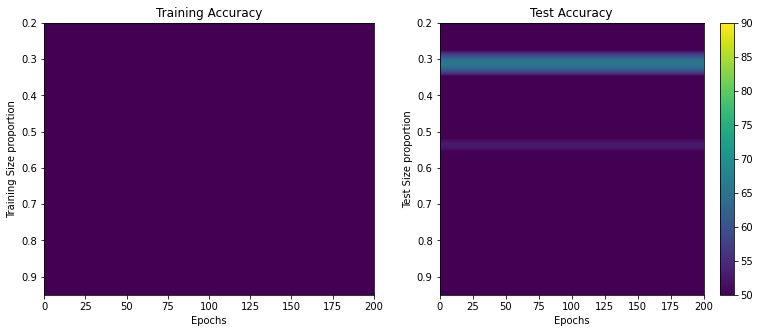

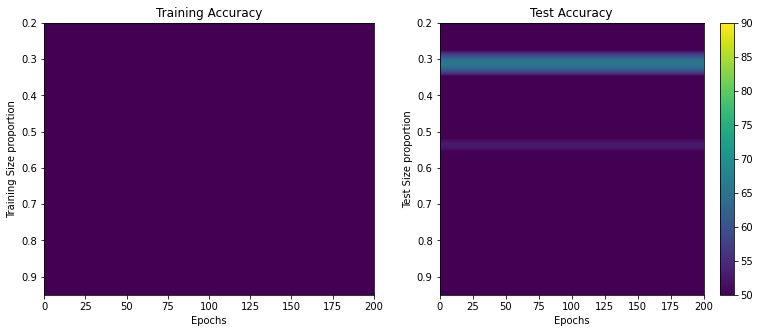

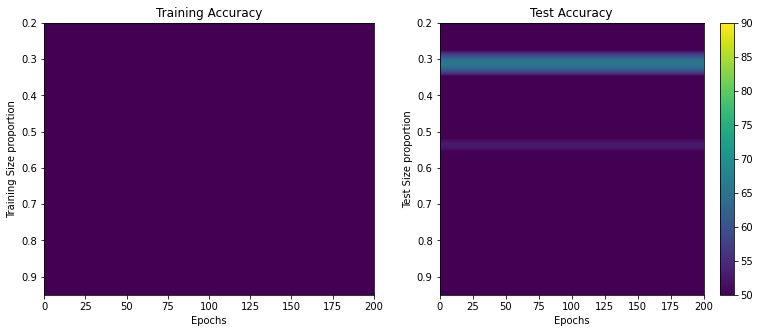

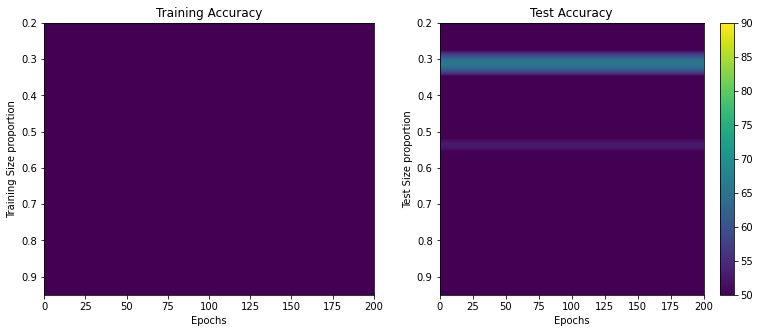

In [ ]:
trainSetSizes = np.linspace(.2, .95,10)
allTrainAcc = np.zeros((len(trainSetSizes),numepochs))
allTestAcc = np.zeros((len(trainSetSizes), numepochs))
for i in range(len(trainSetSizes)):
  ANNiris, lossfun, optimizer = createANewModel()
  trainAcc, testAcc = trainTheModel(trainSetSizes[i])
  allTrainAcc[i, :] = trainAcc
  allTestAcc[i, :] = testAcc
  fig,ax = plt.subplots(1,2,figsize=(13,5))
  ax[0].imshow(allTrainAcc, aspect = 'auto', vmin = 50, vmax = 90, extent=[0, numepochs, trainSetSizes[-1], trainSetSizes[0]])
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Training Size proportion')
  ax[0].set_title('Training Accuracy')

  p = ax[1].imshow(allTestAcc, aspect='auto', vmin = 50, vmax = 90, extent=[0,numepochs, trainSetSizes[-1], trainSetSizes[0]])
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Test Size proportion')
  ax[1].set_title('Test Accuracy')
  fig.colorbar(p, ax=ax[1])
  plt.show()

# **OVERFITTING**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

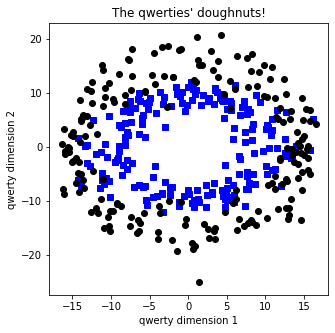

In [ ]:
nPerClust = 200
th = np.linspace(0,4*np.pi,nPerClust)
r1 = 10
r2 = 15
a = [r1*np.cos(th) + np.random.randn(nPerClust)*3, r1*np.sin(th)+np.random.randn(nPerClust)]
b = [r2*np.cos(th) + np.random.randn(nPerClust), r2*np.sin(th) + np.random.randn(nPerClust)*3]

labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust,1))))
data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],'ko')
plt.title("The qwerties' doughnuts!")
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size =.2)
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

batchsize = 16 #make change here 
train_loader = DataLoader(train_data, batch_size = batchsize, shuffle = True)
test_loader = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [ ]:
class theModelClass(nn.Module):
  def __init__(self, dropoutRate):
    super().__init__()
    self.input = nn.Linear(2, 128)
    self.hidden = nn.Linear(128, 128)  
    self.output = nn.Linear(128, 1)  
    self.dr = dropoutRate
  def forward(self, x):
    x = F.relu(self.input(x))
    x = F.dropout(x, p=self.dr, training=self.training)
    x = F.relu(self.hidden(x))
    x = F.dropout(x, p=self.dr, training=self.training)
    x = F.relu(self.hidden(x))
    x = F.dropout(x, p=self.dr, training=self.training)
    x = self.output(x)
    return x



```
# This is formatted as code
class theModelClass(nn.Module):
  def __init__(self, dropoutRate):
    super().__init__()
    self.input = nn.Linear(2, 256)  # change number of neurons to 256
    self.hidden = nn.Linear(256, 256)  # change number of neurons to 256
    self.output = nn.Linear(256, 1)  
    self.dr = dropoutRate
  def forward(self, x):
    x = F.relu(self.input(x))
    x = F.dropout(x, p=self.dr, training=self.training)
    x = F.relu(self.hidden(x))
    x = F.dropout(x, p=self.dr, training=self.training)
    x = F.relu(self.hidden(x))
    x = F.dropout(x, p=self.dr, training=self.training)
    x = self.output(x)
    return x
```

change the number of hidden layers



```
# This is formatted as code
class theModelClass(nn.Module):
def init(self, dropoutRate):
super().init()
self.input = nn.Linear(2, 256)
self.hidden1 = nn.Linear(256, 256) # add a new hidden layer with 256 neurons
self.hidden2 = nn.Linear(256, 256) # add another hidden layer with 256 neurons
self.output = nn.Linear(256, 1)
self.dr = dropoutRate

def forward(self, x):
x = F.relu(self.input(x))
x = F.dropout(x, p=self.dr, training=self.training)
x = F.relu(self.hidden1(x))
x = F.dropout(x, p=self.dr, training=self.training)
x = F.relu(self.hidden2(x)) # pass through the 2nd hidden layer
x = F.dropout(x, p=self.dr, training=self.training)
x = self.output(x)
return x
```




In [ ]:
def createANewModel(dropoutrate):
  ANNQC = theModelClass(dropoutrate)
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(ANNQC.parameters(), lr=.002) #make change here for lr
  return ANNQC, lossfun, optimizer

numepochs = 1000 #make change here 

def trainTheModel(ANNQC, lossfun, optimizer):
  trainAcc = []
  testAcc = []
  
  for epochi in range(numepochs):
    ANNQC.train()
    batchAcc = []
    for X,y in train_loader:
      yHat = ANNQC(X)
      loss = lossfun(yHat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      batchAcc.append(100*torch.mean(((yHat >0)==y).float()).item())
      trainAcc.append(np.mean(batchAcc))
      ANNQC.eval()
      X,y = next(iter(test_loader))
      yHat = ANNQC(X)
      testAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
      return trainAcc, testAcc

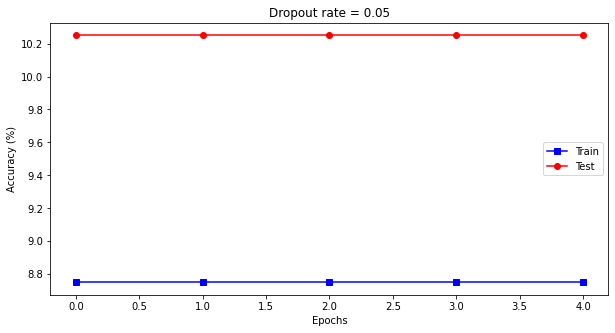

In [ ]:
dropoutrate = .05 #make change here for drop out rate
ANNQC, lossfun, optimizer = createANewModel(dropoutrate)
trainAcc, testAcc = trainTheModel(ANNQC, lossfun, optimizer)
def smooth(x, k = 5):
  return np.convolve(x, np.ones(k)/k, mode='same')
fig = plt.figure(figsize = (10,5))
plt.plot(smooth(trainAcc), 'bs-')
plt.plot(smooth(testAcc), 'ro-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train', 'Test'])
plt.title('Dropout rate = %g'%dropoutrate)
plt.show()

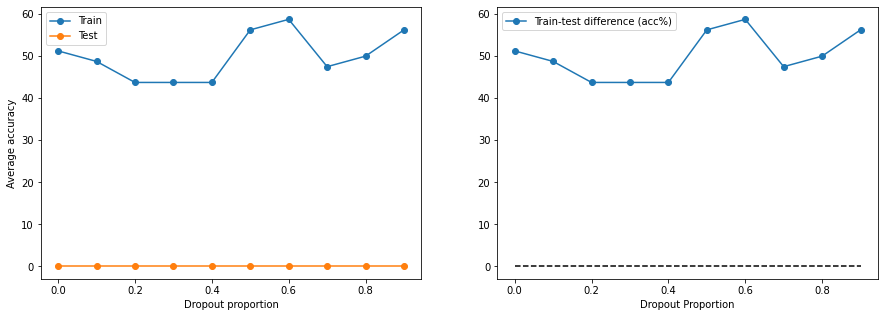

In [ ]:
dropoutRates = np.arange(10)/10
results = np.zeros((len(dropoutRates),2))
for di in range(len(dropoutRates)):
  ANNQC,lossfun,optimizer = createANewModel(dropoutRates[di])
  trainAcc, testAcc = trainTheModel(ANNQC, lossfun, optimizer)
  results[di,0] = np.mean(trainAcc[-100:])
  results[di, 0] = np.mean(testAcc[-100:])
fig,ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(dropoutRates, results, 'o-')
ax[0].set_xlabel('Dropout proportion')
ax[0].set_ylabel('Average accuracy')
ax[0].legend(['Train', 'Test'])

ax[1].plot(dropoutRates, -np.diff(results, axis=1), 'o-')
ax[1].plot([0,.9], [0,0], 'k--')
ax[1].set_xlabel('Dropout Proportion')
ax[1].legend(['Train-test difference (acc%)'])
plt.show()
